In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [28]:
DATADIR = 'archive/colorclassification/ColorClassification'
CATEGORIES = ['orange','Violet','red','Blue','Green','Black','Brown','White']
IMG_SIZE=100

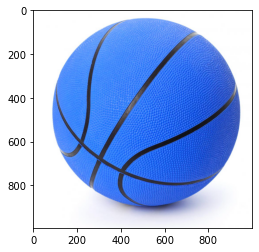

In [29]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break


In [30]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()   

In [31]:
print(len(training_data))

107


In [32]:
lenofimage = len(training_data)

In [33]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [34]:
X.shape

(107, 30000)

In [35]:
X = X/255.0

In [36]:
X[1]

array([0.16470588, 0.16470588, 0.16470588, ..., 0.33333333, 0.33333333,
       0.33333333])

In [37]:
y=np.array(y)

In [38]:
y.shape

(107,)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [40]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [41]:
y2 = svc.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.7037037037037037


In [43]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.80      0.80      0.80         5
           2       1.00      1.00      1.00         2
           3       0.33      1.00      0.50         2
           4       1.00      0.40      0.57         5
           5       0.75      0.60      0.67         5
           6       0.83      0.83      0.83         6
           7       0.50      1.00      0.67         1

    accuracy                           0.70        27
   macro avg       0.65      0.70      0.63        27
weighted avg       0.77      0.70      0.70        27



/home/sanjju/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanjju/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sanjju/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [45]:
result

,original,predicted
0,1,1
1,6,6
2,4,3
3,6,6
4,5,5
5,0,6
6,1,5
7,1,1
8,6,6
9,5,5
